# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Important Distributions

Analytic cumulative distribution functions (CDFs) and probability density functions (PDFs) are frequently used as models for practical random processes. They typically describe the statistical properties of a random process by a few parameters. These parameters may be fitted to an actual random process and used in algorithms for statistical signal processing. Alternatively the parameters may be used to generate sample functions with a given distribution. For the following, a real-valued wide-sense stationary (WSS) random process $x[k]$ is assumed.

First a function is defined which plots the PDF and CDF of a given model.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_pdf_cdf(x, distr):
    plt.figure(figsize = (10, 5))

    plt.subplot(121)
    plt.plot(x, distr.pdf(x))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$p_x(\theta)$')
    plt.title('PDF')
    plt.grid()

    plt.subplot(122)
    plt.plot(x, distr.cdf(x))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P_x(\theta)$')
    plt.title('CDF')
    plt.grid()

### Uniform Distribution

#### Definition

The PDF of the [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) is given as

\begin{equation}
p_x(\theta) = \begin{cases} \frac{1}{b - a} & \text{for } a \leq \theta \leq b \\ 0 & \text{otherwise} \end{cases}
\end{equation}

where $a$ and $b$ with $a \leq b$ denote the lower and upper bound for the amplitude of the random signal $x[k]$. The uniform distribution implies that all amplitudes between these bounds occur with the same probability $\frac{1}{b - a}$. Its CDF can be derived from the PDF by integration over $\theta$

\begin{equation}
P_x(\theta) = \begin{cases} 0 & \text{for } \theta < a \\ 
\frac{\theta - a}{b - a} & \text{for } a \leq \theta < b \\
1 & \text{for } \theta \geq b \end{cases}
\end{equation}

The PDF/CDF of a uniformly distributed random signal with $a=0$ and $b=1$ is plotted for illustration

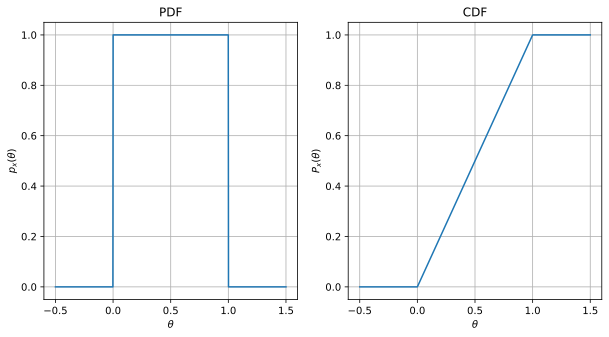

In [2]:
plot_pdf_cdf(np.linspace(-.5, 1.5, num=1000), stats.uniform(loc=0, scale=1))

The [linear mean](ensemble_averages.ipynb#Linear-mean) is derived from the PDF as

\begin{equation}
\mu_x = \frac{a+b}{2}
\end{equation}

and the variance as

\begin{equation}
\sigma_x^2 = \frac{(b-a)^2}{12}
\end{equation}

**Exercise**

* Derive the linear mean and the variance from the PDF.
* What values does the linear mean and variance for the above plotted example PDF/CDF take?

Solution: The linear mean and the variance can be derived by introducing the PDF into their definitions in terms of ensemble averages. This yields

$$\mu_x[k] = E\{ x[k] \} = \int\limits_{a}^{b} \theta \, \frac{1}{b -a} \; \mathrm{d}\theta = \frac{a + b}{2}$$

and

$$\sigma_x^2 = E\{ x[k] \} - \mu_x^2 = \int\limits_{a}^{b} \theta^2 \, \frac{1}{b -a} \; \mathrm{d}\theta - \frac{(a+b)^2}{4} = \frac{(b-a)^2}{12}$$

It can be concluded from the example PDF that $a=0$ and $b=1$. Introducing these values in above equations derives $\mu_x = \frac{1}{2}$ and $\sigma_x^2 = \frac{1}{12}$.

#### Example

Most software frameworks for numerical mathematics provide functionality to draw samples from a random process for a given PDF. So does [`Numpy`](http://docs.scipy.org/doc/numpy/reference/routines.random.html) or [`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions). 

In the following example a large but finite number of samples is drawn from a random process which generates uniformly distributed samples. First a function is defined that estimates the PDF by computing the histogram over the given random samples. The CDF is computed from the estimated PDF by cumulative summation. Both the estimated PDF and CDF are plotted for illustration.

In [3]:
def estimate_plot_pdf_cdf(x, nbins=100):

    plt.figure(figsize = (10, 6))
    plt.hist(x, nbins, density=True)
    plt.title('Estimated PDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\hat{p}_x(\theta)$')
    plt.grid()
    
    plt.figure(figsize = (10, 6))
    plt.hist(x, nbins, cumulative=True, density=True)
    plt.title('Estimated CDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\hat{P}_x(\theta)$')
    plt.grid()
    
    print('Estimated linear mean: %f' %np.mean(x))
    print('Estimated variance: %f' %np.var(x))

For the standard uniform distribution ($a=0$, $b=1$) we get the following results

Estimated linear mean: 0.499219
Estimated variance: 0.083730


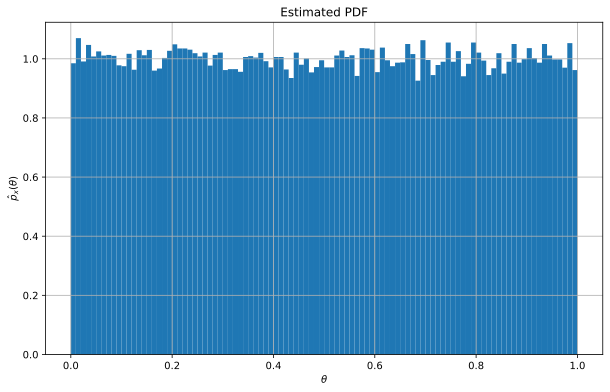

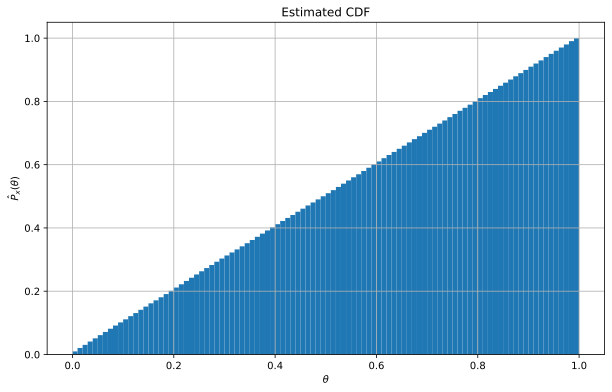

In [4]:
np.random.seed(1)
estimate_plot_pdf_cdf(stats.uniform.rvs(size=100000, loc=0, scale=1), nbins=100)

**Exercise**

* Why is the estimate of the CDF smoother that the estimate of the PDF?
* Change the parameters `loc` and `scale` in above example. How are these parameters related to the upper $b$ and lower bound $a$?
* What changes if you change the length `size` of the random signal?

Solution: The estimate of the CDF is smoother as compared to the estimate of the PDF since the integration performed to compute the CDF from the PDF can be interpreted as low-pass filter. This attenuates the 'fine-structure' in the PDF. The lower bound $a$ is equal to `loc` the upper bound $b$ to `loc+scale`. Increasing the length of the random signal lowers the statistical uncertainty when estimating the PDF.

### Normal Distribution

#### Definition

The PDF of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)/Gaussian distribution  is given as

\begin{equation}
p_x(\theta) = \frac{1}{\sqrt{2 \pi} \sigma_x} \mathrm{e}^{- \frac{(\theta - \mu_x)^2}{2 \sigma_x^2}}
\end{equation}

where $\mu_x$ and $\sigma_x^2$ denote its linear mean and variance, respectively. The central limit theorem states that averages of random variables independently drawn from independent distributions become normally distributed when the number of random variables is sufficiently large. As a result, random signals that are expected to be a combination of many independent processes often have distributions that are approximately normal. Normal distributions are often used to model random processes whose internal structure is not exactly known but can be assumed to be a combination of various random processes. Note that a normal distributed random signals shows a small but finite probability that samples with very high amplitudes occur. This is in contrast to the facts that technical systems can only generate and process signals of finite amplitude. However, the normal distribution is often assumed to provide a reasonable approximation in such cases.

The maximum value of the PDF is located at $\theta = \mu_x$ and is given as

\begin{equation}
p_x(\mu_x) = \frac{1}{\sqrt{2 \pi} \sigma_x}
\end{equation}

The CDF of the normal distribution is derived by integrating the PDF over $\theta$

\begin{align}
P_x(\theta) &= \frac{1}{\sqrt{2 \pi} \sigma_x} \int\limits_{—\infty}^{\theta} \mathrm{e}^{- \frac{(\zeta - \mu_x)^2}{2 \sigma_x^2}} \mathrm{d}\zeta \\
&= \frac{1}{2} \left( 1 + \text{erf}\left( \frac{\theta-\mu_x}{\sqrt{2} \sigma_x} \right)\right)
\end{align}

where $\text{erf}(\cdot)$ denotes the [error function](https://en.wikipedia.org/wiki/Error_function).

The PDF and CDF are illustrated for the standard zero-mean normal distribution ($\mu_x=0$, $\sigma_x^2=1$)

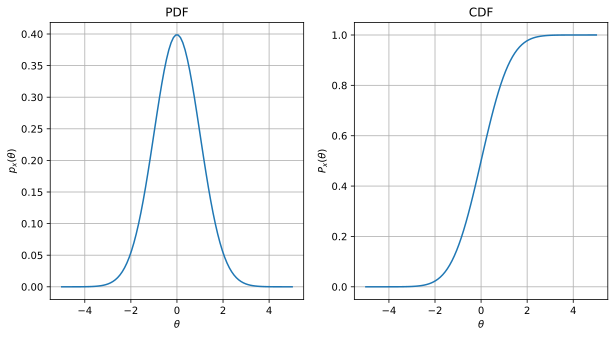

In [5]:
plot_pdf_cdf(np.linspace(-5, 5, num=100), stats.norm(loc=0, scale=1))

#### Example

For the standard zero-mean uniform distribution we get the following numerical results when drawing a large number of random samples

Estimated linear mean: 0.004897
Estimated variance: 0.993752


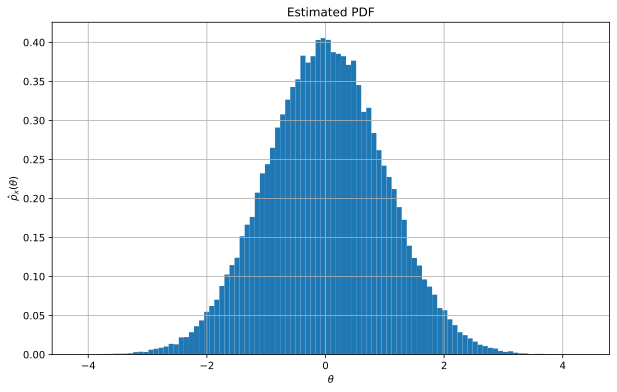

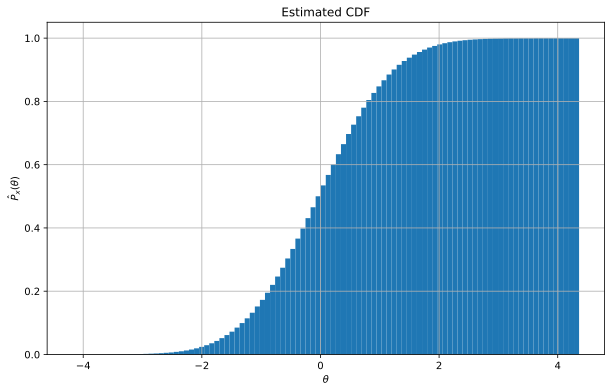

In [6]:
estimate_plot_pdf_cdf(stats.norm.rvs(size=100000, loc=0, scale=1), nbins=100)

**Exercise**

* Change the linear mean $\mu_x$ and the variance $\sigma_x^2$ by changing the `loc` and `scale` parameter. How is the mean and variance related to these parameters?
* Assume you want to model measurement noise with zero-mean and a given power $P$. How do you have to chose the parameters of the normal distribution?

Solution: The linear mean $\mu_x$ is equal to `loc` and the standard deviation $\sigma_x$ is equal to `scale`. The quadratic mean $E\{x^2[k]\}$ quantifies the average power of a random process. For a zero-mean process the quadratic mean $E\{x^2[k]\}$ is equal to the variance $\sigma_x^2$.

### Laplace Distribution

#### Definition

The PDF of the [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) is given as

\begin{equation}
p_x(\theta) = \frac{1}{\sqrt{2} \sigma_x} \mathrm{e}^{- \sqrt{2} \frac{|\theta - \mu_x|}{\sigma_x}}
\end{equation}

where $\mu_x$ and $\sigma_x^2$ denote the linear mean and variance, respectively. Laplace distributions are often used to model the amplitude distribution of a speech or music signal. The maximum value of the PDF is located at $\theta = \mu_x$ and is given as

\begin{equation}
p_x(\mu_x) = \frac{1}{\sqrt{2} \sigma_x}
\end{equation}


The CDF can be derived by integrating the PDF over $\theta$

\begin{equation}
P_x(\theta) = \begin{cases}
\frac{1}{2} \mathrm{e}^{\sqrt{2} \frac{\theta - \mu_x}{\sigma_x}} & \text{for } \theta \leq \mu_x \\
1 - \frac{1}{2} \mathrm{e}^{- \sqrt{2} \frac{\theta - \mu_x}{\sigma_x}} & \text{for } \theta > \mu_x
\end{cases}
\end{equation}

For the zero-mean, unit-variance Laplace distribution the PDF/CDF is illustrated. Note the scale parameter in [`scipy.stats.laplace`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace) is related to the variance by $\lambda = \frac{\sigma_x}{\sqrt{2}}$

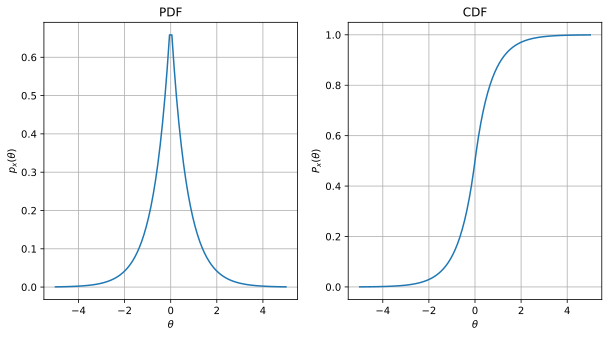

In [7]:
plot_pdf_cdf(np.linspace(-5, 5, num=100), stats.laplace(loc=0, scale=1/np.sqrt(2)))

#### Example

For the standard zero-mean Laplace distribution we get the following estimates when drawing a large number of random samples

Estimated linear mean: -0.006542
Estimated variance: 1.001713


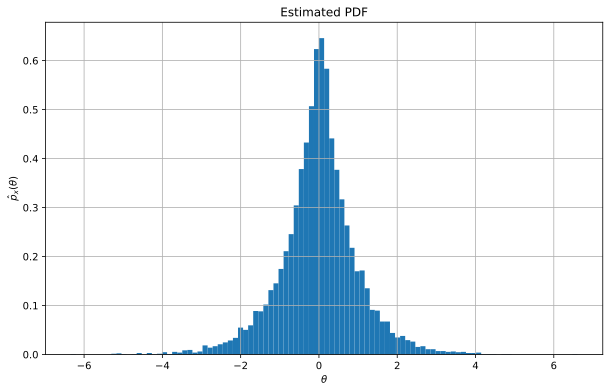

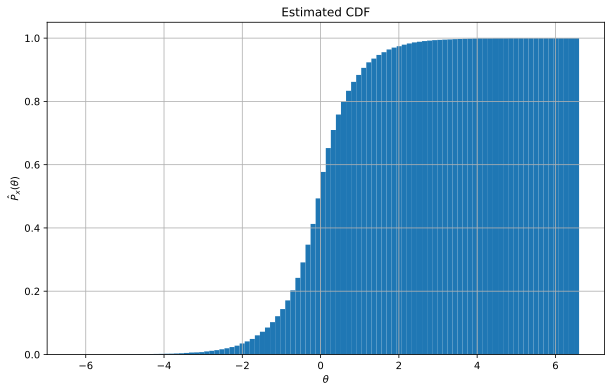

In [8]:
estimate_plot_pdf_cdf(stats.laplace(scale=1/np.sqrt(2)).rvs(size=10000), nbins=100)

### Example - Amplitude Distribution of a Speech Signal

Lets estimate the PDF and CDF of a recorded speech signal in order to see if we can model it by one of the PDFs introduced above.

Estimated linear mean: -0.000067
Estimated variance: 0.018548


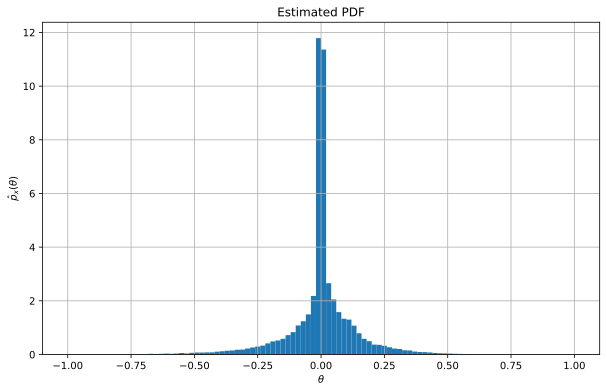

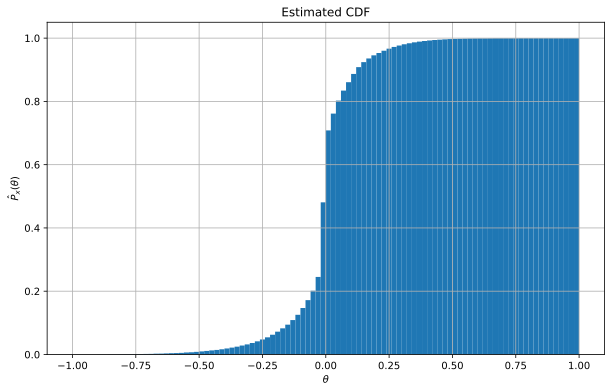

In [9]:
from scipy.io import wavfile

fs, x = wavfile.read('../data/speech_8k.wav')
x = np.asarray(x, dtype=float)/2**15
estimate_plot_pdf_cdf(x, nbins=100)

**Exercise**

* Which analytic PDF/CDF can be used to model a speech signal?
* How would you chose the parameters of the distribution to fit the estimated PDF?

Solution: The Laplace distribution fits very well to the estimated PDF. It is frequently used to model the amplitude distribution of a speech signal. For the given speech signal its mean and variance can be approximated as $\mu_x = 0$ and $\sigma_x^2 = 0.02$.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.